In [99]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage 
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [100]:
# Problem Statement -: Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
# Draw the inferences from the clusters obtained.


In [101]:
Airline=pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Clustering\\EastWestAirlines.csv')
Airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [102]:
# Column rename.
Airline.rename(columns={'Award?':'Award'}, inplace=True)

In [103]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [104]:
data=Airline.drop(['ID#'],axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [105]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


In [106]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [107]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [108]:
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


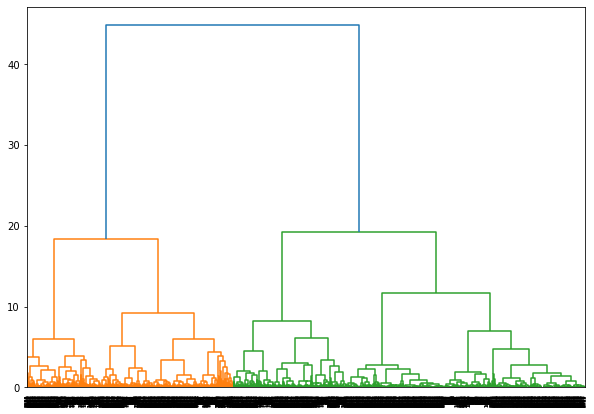

In [109]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [110]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=5)

In [111]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [112]:
y_hc

array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

In [113]:
data['h_clusterid']=hc.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [114]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


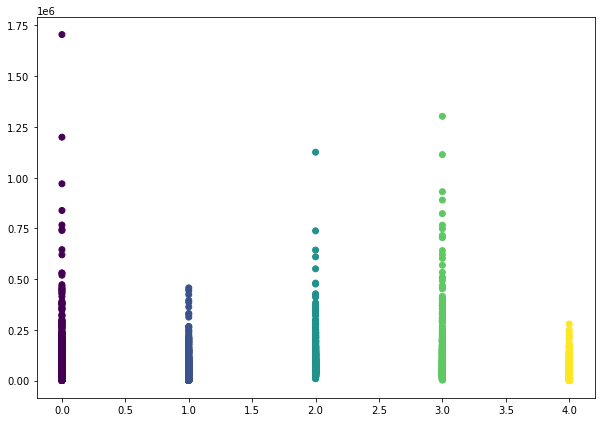

In [115]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['h_clusterid'],data['Balance'], c=hc.labels_) 

# KMeans

In [116]:
# import K-Means libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Import the Data - KMeans Clustering

In [117]:
air=pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Clustering\\EastWestAirlines.csv')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [118]:
#Drop the colums
df=air.drop(['ID#','Award?'],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [119]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df= scaler.fit_transform(df)
scaled_df.shape

(3999, 10)

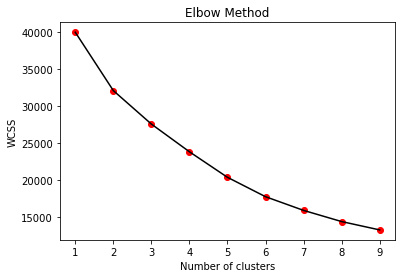

In [120]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss,color='black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [121]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [122]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [124]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-3.06402059e-01, -4.85533171e-02, -6.52848950e-01,
        -9.82418871e-02, -6.06611456e-02, -5.38706422e-01,
        -5.34834749e-01, -1.76568619e-01, -1.91593277e-01,
        -2.06314125e-01],
       [ 4.12050893e-01, -6.17975662e-03,  1.17325964e+00,
        -9.82418871e-02, -5.51944860e-02,  8.66674081e-01,
         7.37329501e-01, -1.00047426e-01, -1.08441906e-01,
         3.36006390e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01],
       [ 1.16381817e+00,  8.67587458e-01,  9.26690825e-02,
        -9.82418871e-02, -6.27665798e-02,  6.11218925e-01,
         1.62167306e+00,  3.61736517e+00,  3.88708386e+00,
         3.02345046e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.

In [125]:
x=pd.Series(clusters_new.labels_)
df['clusterid_new']=x
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [126]:
df.groupby('clusterid_new').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,
0,42717.089528,106.467762,1.162218,1.000000,1.000411,4148.407392,6.473101,212.740452,0.646817,3691.115811
1,115246.442635,139.540340,3.675796,1.000000,1.001480,38101.469282,18.687639,320.348631,0.962990,4816.606958
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
3,190871.212903,815.251613,2.187097,1.000000,1.000000,31904.529032,27.174194,5524.490323,16.116129,4742.864516
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233


(<AxesSubplot:ylabel='clusterid_new'>, None)

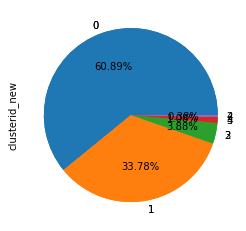

<Figure size 432x288 with 0 Axes>

In [127]:
# Visualization of the new Cluserid
plt.pie(df.clusterid_new.value_counts(),labels=['0','1','2','3','4'], autopct='%.2f%%') #autopct to get the no in %
df.clusterid_new.value_counts().plot(kind="pie"),plt.figure().savefig('pie3.png',dpi=250,bbox_inches='tight')

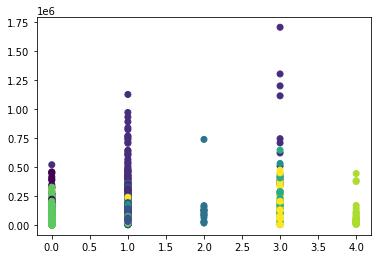

In [128]:
# Scatter plot between Clusters & 'Balance'.
x=df.clusterid_new
y=df.Balance

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

# DBSCAN

In [129]:
#Import the libraries for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
data_air=pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Clustering\\EastWestAirlines.csv')


In [131]:
#Drop the colums
A1=data_air.drop(['ID#','Award?'],axis=1)
A1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [132]:
A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [133]:
Data1=A1.iloc[:,1:11]

In [134]:
Data1.values

array([[   0,    1,    1, ...,    0,    0, 7000],
       [   0,    1,    1, ...,    0,    0, 6968],
       [   0,    1,    1, ...,    0,    0, 7034],
       ...,
       [   0,    3,    1, ...,    0,    0, 1402],
       [   0,    1,    1, ...,  500,    1, 1401],
       [   0,    1,    1, ...,    0,    0, 1398]], dtype=int64)

In [135]:
stscaler = StandardScaler().fit(Data1.values)
X = stscaler.transform(Data1.values)

In [136]:
X

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.39545434],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.37995704],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.41192021],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.32860326,
        -0.36216787, -1.31560393],
       [-0.18629869, -0.76957841, -0.09824189, ...,  0.0285309 ,
        -0.09850333, -1.31608822],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787, -1.31754109]])

In [137]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=0.4,min_samples=11)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=11)

In [138]:
#Noisy samples Label = -1
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [139]:
cls=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cls

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,2
3997,0


In [140]:
new_data=pd.concat([A1,cls],axis=1)
new_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,-1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [141]:
new_data.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
-1,116486.364353,454.506309,2.688486,1.045741,1.038644,32613.581230,18.957413,1326.772871,3.868297,4535.077287
0,37652.848655,0.000000,1.000000,1.000000,1.000000,2321.207399,4.657511,73.555493,0.271861,3651.247197
1,97330.127737,0.000000,4.000000,1.000000,1.000000,37319.580292,15.729927,30.167883,0.105839,4763.405109
2,77616.323462,0.000000,3.000000,1.000000,1.000000,18220.977221,14.931663,35.364465,0.136674,4331.576310
3,61015.816667,0.000000,2.000000,1.000000,1.000000,8426.972222,13.222222,11.672222,0.066667,4176.527778
4,157371.444444,0.000000,5.000000,1.000000,1.000000,63175.861111,14.805556,8.333333,0.055556,5554.444444
5,114670.944444,0.000000,5.000000,1.000000,1.000000,58412.500000,15.055556,0.000000,0.000000,2630.333333


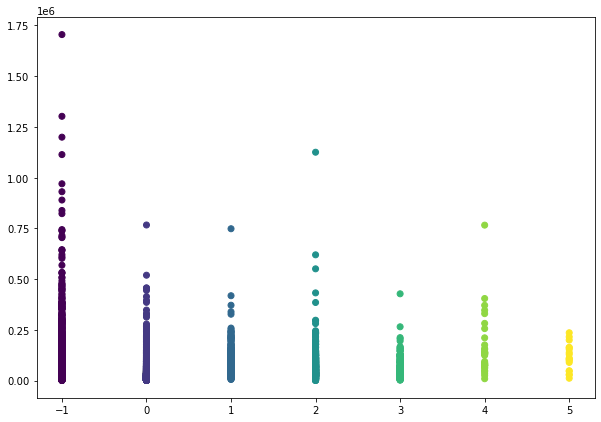

In [142]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(new_data['cluster'],new_data['Balance'], c=dbscan.labels_) 

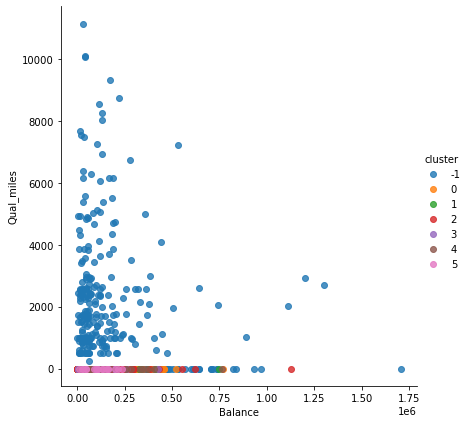

In [143]:
# Plot between pairs Balance~Qual_miles
sns.lmplot( 'Balance','Qual_miles', data=new_data,
        hue = 'cluster',
        fit_reg=False, size = 6 );

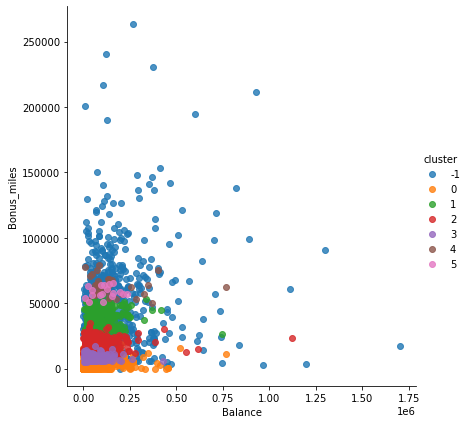

In [144]:
# Plot between pairs Balance~Bonus_miles
sns.lmplot( 'Balance','Bonus_miles',  data=new_data,
        hue = 'cluster',
        fit_reg=False, size = 6 );